In [1]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0.9000     ✔ purrr   0.3.1     
✔ tibble  2.0.1          ✔ dplyr   0.8.0.1   
✔ tidyr   0.8.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


character(0)

In [2]:
require(UsingR)
require(ggplot2)
head(father.son)

Loading required package: UsingR
Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: HistData
Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units


Attaching package: ‘UsingR’

The following object is masked from ‘package:survival’:

    cancer



fheight,sheight
65.04851,59.77827
63.25094,63.21404
64.95532,63.34242
65.75250,62.79238
61.13723,64.28113
63.02254,64.24221


In [3]:
set.seed(100)  
trainingRowIndex <- sample(1:nrow(father.son), 0.8*nrow(father.son)) 
trainingData <- father.son[trainingRowIndex, ] 
testData  <- father.son[-trainingRowIndex, ]  

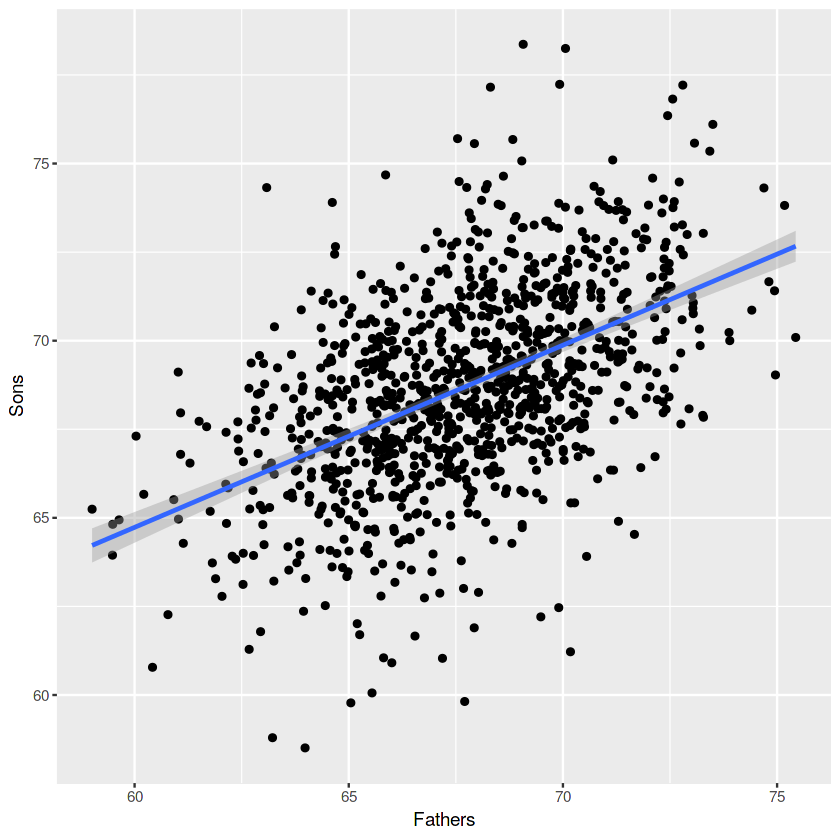

In [4]:
ggplot(father.son,aes(x=fheight,y=sheight)) + geom_point() + geom_smooth(method="lm") + labs(x="Fathers", y="Sons")

In [5]:
heightsLM <- lm(sheight ~ fheight, data=trainingData)
heightsLM



Call:
lm(formula = sheight ~ fheight, data = trainingData)

Coefficients:
(Intercept)      fheight  
    33.6146       0.5182  


In [6]:
testData

,fheight,sheight
5,61.13723,64.28113
7,65.37053,64.08231
8,64.72398,63.99574
9,66.06509,64.61338
20,66.75929,65.49008
26,64.96650,65.97259
27,64.70662,65.95887
44,65.44592,67.03420
46,65.67038,69.29890
47,68.66078,69.09114


In [7]:
predictSons_height <- predict(heightsLM,testData)
predictSons_height

5        7        8        9       20       26       27       44 
65.29817 67.49202 67.15696 67.85197 68.21173 67.28264 67.14796 67.53109 
      46       47       53       55       57       65       67       68 
67.64742 69.19715 67.73101 67.59091 67.70080 69.02329 69.35634 69.33434 
      69       73       75       76       80       81       84       85 
69.68836 66.17101 66.73647 67.06222 67.82763 67.57851 68.16996 68.32396 
      87      101      102      112      114      131      134      137 
68.25654 70.09598 70.50936 67.64581 68.10138 70.55485 72.46269 67.64146 
     141      161      163      178      179      182      191      196 
68.58753 67.59464 68.29083 72.38302 68.54129 69.54825 68.97873 70.88293 
     197      203      204      210      217      221      225      229 
66.30705 68.61649 71.34150 66.02341 65.76640 65.64978 68.03782 66.62144 
     237      243      245      246      259      268      269      276 
69.39867 67.63489 67.81584 67.71348 67.21045 67.85790 67.68158 68.51634 
     281      284      288      289      294      304      317      320 
68.98676 69.53914 65.95846 66.34268 67.77332 68.14776 70.24917 71.17478 
     333      342      348      359      361      364      368      370 
68.78659 69.13679 70.56063 68.83778 69.24343 69.57759 69.83859 70.52351 
     384      391      392      400      403      404      406      408 
69.42914 71.06449 70.67149 69.93756 70.96765 71.10331 68.78179 69.68333 
     410      417      422      430      437      438      439      441 
70.17137 72.32294 66.29902 67.38207 66.70341 67.52601 67.62206 68.66128 
     444      446      449      457      460      463      474      475 
66.56016 67.36976 67.93610 67.11322 67.81069 68.49869 66.61758 67.13620 
     478      483      486      490      495      497      498      499 
67.09754 67.58179 67.82279 68.33074 69.02877 68.97485 69.41235 69.25392 
     503      514      527      528      530      537      538      547 
65.48937 68.41578 69.39024 69.43771 70.01730 66.26912 67.08198 68.44859 
     552      563      564      565      571      573      580      582 
69.29761 70.63830 70.79813 66.96621 68.42605 68.88612 69.61047 69.73136 
     586      596      597      603      608      611      613      614 
70.56853 69.11382 68.65054 69.80670 71.19984 68.76869 69.47297 69.30422 
     616      622      629      633      637      650      651      655 
69.95341 69.39854 69.10804 69.28477 67.12897 67.22492 68.30621 67.30279 
     657      666      671      675      678      679      684      689 
68.16421 68.24887 66.71005 67.91897 68.49437 68.52594 69.52628 66.68992 
     691      697      702      709      731      744      751      753 
67.16421 69.62135 67.65656 68.51123 68.58805 69.50901 70.70037 66.43857 
     757      759      760      761      765      768      775      787 
67.76847 67.59573 67.72875 68.27727 68.73972 69.03686 69.71867 68.19931 
     797      800      820      830      832      834      867      869 
69.73485 70.49357 70.01662 69.16244 69.98422 70.41327 64.44136 66.71184 
     873      883      889      893      901      904      905      913 
70.17754 68.77179 67.37598 68.49619 70.31114 66.96286 66.72650 66.63267 
     922      925      930      933      935      938      941      955 
68.09475 68.62621 69.12670 69.84904 66.17816 66.94666 67.80653 68.96476 
     963      964      968      969      974      975      982      984 
69.72867 70.15596 66.22014 66.74821 67.70208 68.06899 68.64183 69.50727 
     987      990      992      996      997     1001     1004     1007 
69.38740 69.84869 69.87226 71.31600 67.43917 67.77781 68.82463 68.83405 
    1017     1019     1020     1025     1034     1037     1046     1048 
70.21562 70.73131 71.90069 68.41917 69.66652 70.34658 70.07089 70.31035 
    1049     1053     1055     1065     1067     1073     1076     1077 
70.25545 68.77203 70.08563 71.48298 67.58152 68.70264 70.81527 70.27383

In [8]:
summary(heightsLM)


Call:
lm(formula = sheight ~ fheight, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7621 -1.4976 -0.0134  1.6131  8.9543 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  33.6146     2.0741   16.21   <2e-16 ***
fheight       0.5182     0.0306   16.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.442 on 860 degrees of freedom
Multiple R-squared:  0.2501,	Adjusted R-squared:  0.2492 
F-statistic: 286.8 on 1 and 860 DF,  p-value: < 2.2e-16
